# Exploratory Data Analysis for Titanic Dataset

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno


In [3]:
# Read the test (testing) CSV file
test_df = pd.read_csv('test.csv')

# Read the gender (target variables for testing) CSV file
gender_df = pd.read_csv('gender_submission.csv')

# Check the columns of both dataframes to find the common key column
print("Test DataFrame Columns:", test_df.columns)
print("Gender DataFrame Columns:", gender_df.columns)

key_column = 'PassengerId'

# Merge the dataframes based on the common key column
combined_df = pd.merge(test_df, gender_df[['PassengerId', 'Survived']], on=key_column, how='left')

# Save the combined dataframe to a new CSV file
combined_df.to_csv('combined_test.csv', index=False)

print("Combined DataFrame:")
print(combined_df.head())

Test DataFrame Columns: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Gender DataFrame Columns: Index(['PassengerId', 'Survived'], dtype='object')
Combined DataFrame:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q  

In [4]:
# Reading train.csv
df1 = pd.read_csv("train.csv")

# Reading combined test.csv file
df2 = pd.read_csv("combined_test.csv")

# Concatenating both to get a larger dataset to analyse
df = pd.concat([df1, df2], ignore_index = False)

df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male   NaN      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male   NaN      0   
417                           Peter, Master. Michael J    male   NaN      1   

     Parch              Ticket      Fare Cabin Embarked  
0        0           A/5 21171    7.2500   NaN        S  
1        0            PC 17599   71.2833   C85        C  
2        0    STON/O2. 3101282    7.9250   NaN        S  
3        0              113803   53.1000  C123        S  
4        0              373450    8.0500   NaN        S  
..     ...                 ...       ...   ...      ...  
413      0           A.5. 3236    8.0500   NaN        S  
414      0            PC 17758  108.9000  C105        C  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416      0              359309    8.0500   NaN        S  
417      1                2668   22.3583   NaN        C  

[1309 rows x 12 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [6]:
df.describe()

PassengerId     Survived       Pclass          Age        SibSp  \
count  1309.000000  1309.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000     0.377387     2.294882    29.881138     0.498854   
std     378.020061     0.484918     0.837836    14.413493     1.041658   
min       1.000000     0.000000     1.000000     0.170000     0.000000   
25%     328.000000     0.000000     2.000000    21.000000     0.000000   
50%     655.000000     0.000000     3.000000    28.000000     0.000000   
75%     982.000000     1.000000     3.000000    39.000000     1.000000   
max    1309.000000     1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200

<Axes: >

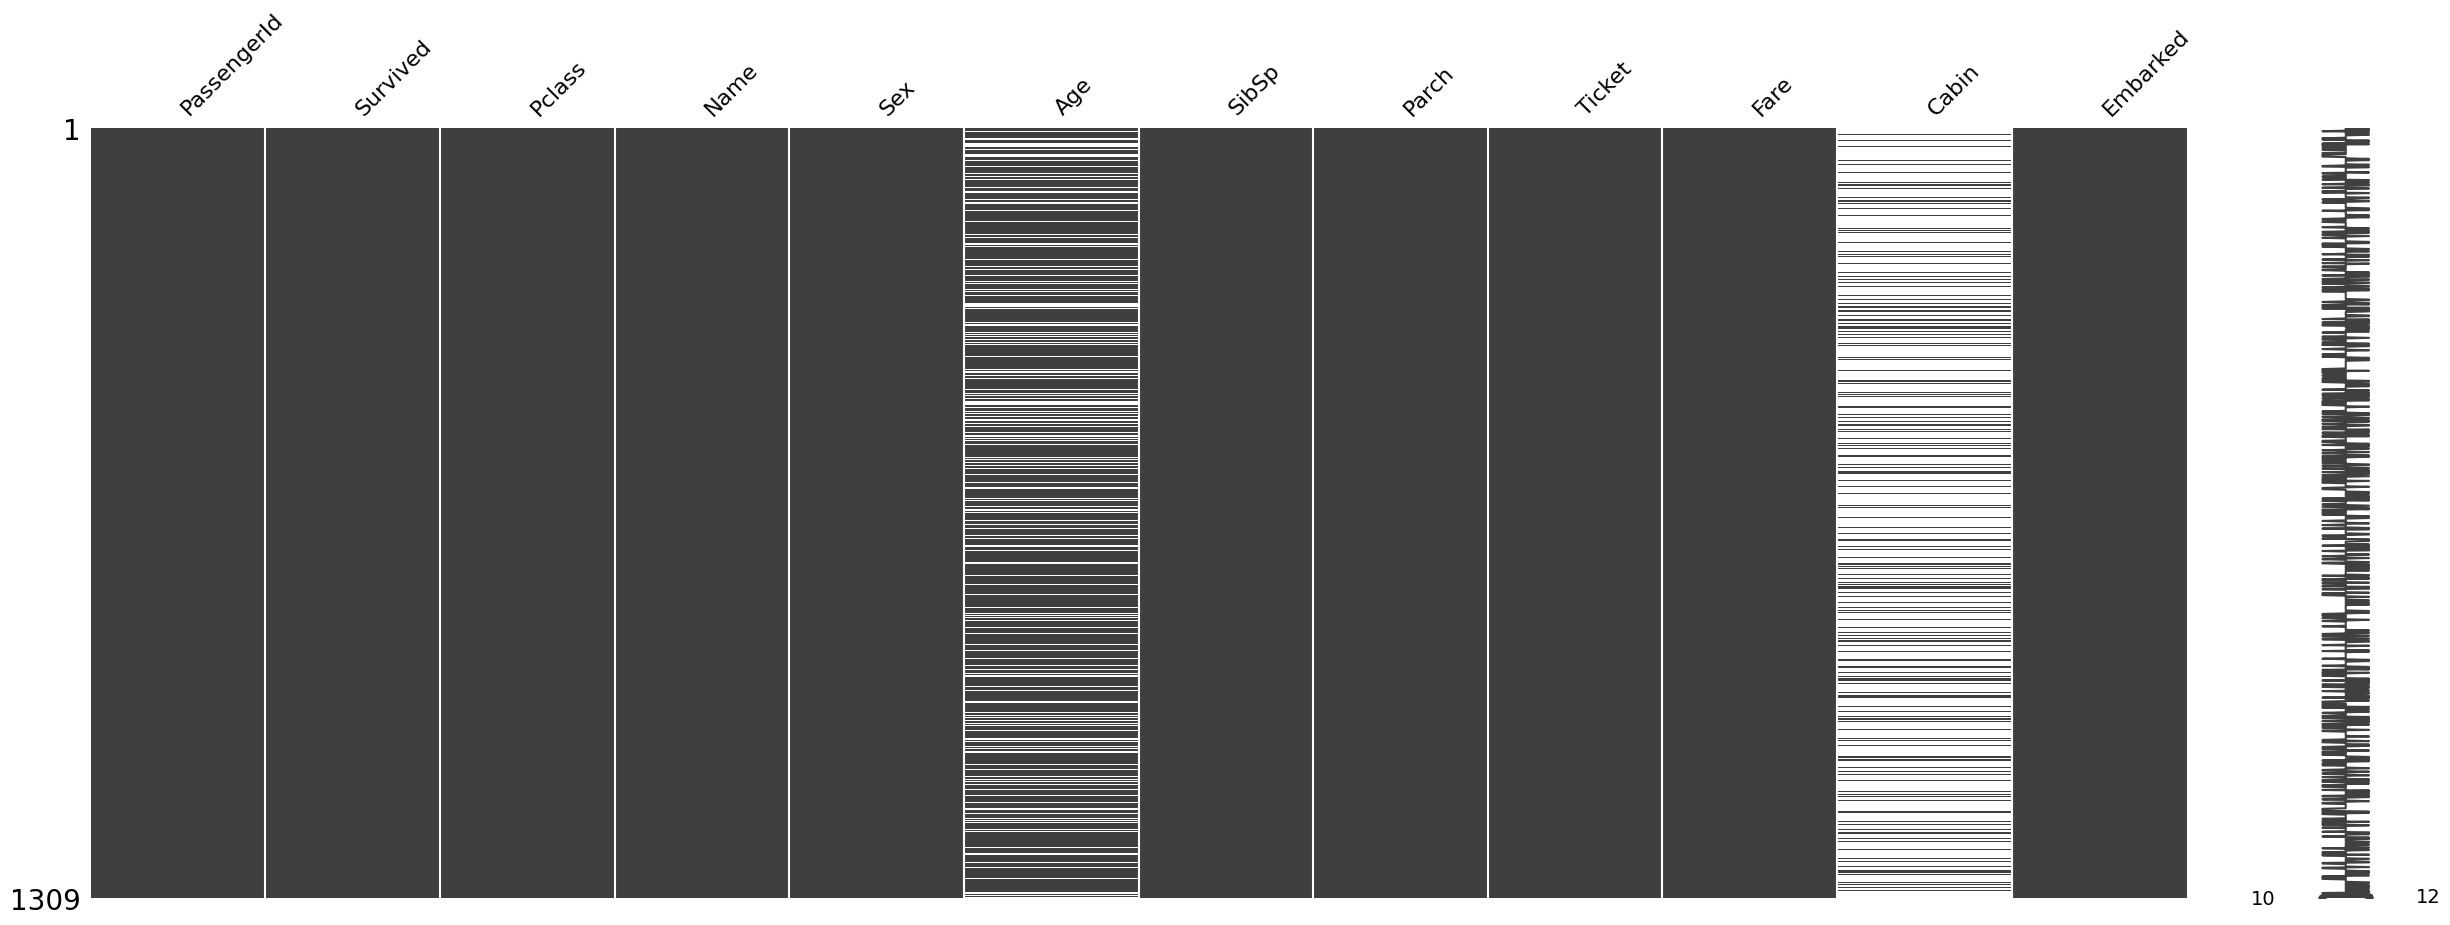

In [7]:
missingno.matrix(df, figsize = (30,10))

It is clear that the columns 'Age' and 'Cabin' have the highest null values present.

In [8]:
df = df.drop(['Ticket','Cabin'], axis=1)
# Remove NaN values
df = df.dropna()

# Feature: Age

<Axes: ylabel='Frequency'>

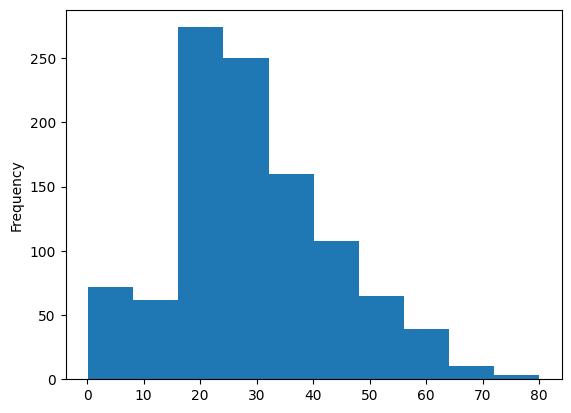

In [9]:
df.Age.plot.hist()

In [10]:
# Specifies the parameters of our graphs
fig = plt.figure(figsize=(18, 6), dpi=1600)
alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

# Plot many different shaped graphs together
ax1 = plt.subplot2grid((2, 3), (0, 0))
# Plot a bar graph of those who survived vs those who did not
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart, ax=ax1)
ax1.set_xlim(-1, 2)
ax1.set_title("Distribution of Survival, (1 = Survived)")

ax2 = plt.subplot2grid((2, 3), (0, 1))
ax2.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# Set the y-axis label
ax2.set_ylabel("Age")
# Set x-axis to show only 0 and 1
ax2.set_xticks([0, 1])
# Format the grid line style of the graph
ax2.grid(True, which='major', axis='y')
ax2.set_title("Survival by Age, (1 = Survived)")

ax3 = plt.subplot2grid((2, 3), (1, 0), colspan=2)
# Plots a kernel density estimate of the subset of the 1st class passengers' age
df.Age[df.Pclass == 1].plot(kind='kde', ax=ax3)
df.Age[df.Pclass == 2].plot(kind='kde', ax=ax3)
df.Age[df.Pclass == 3].plot(kind='kde', ax=ax3)
# Plots an axis label
ax3.set_xlabel("Age")
ax3.set_title("Age Distribution within classes")
# Sets our legend for our graph.
ax3.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

# Show the plot
plt.tight_layout()
plt.show()


# Feature: PClass

<ipython-input-11-1f290bdf6782>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Pclass)


<Axes: xlabel='Pclass', ylabel='Density'>

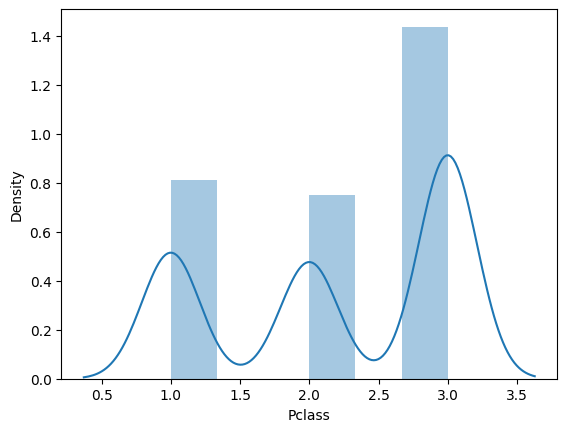

In [11]:
sns.distplot(df.Pclass)

# Feature: Gender

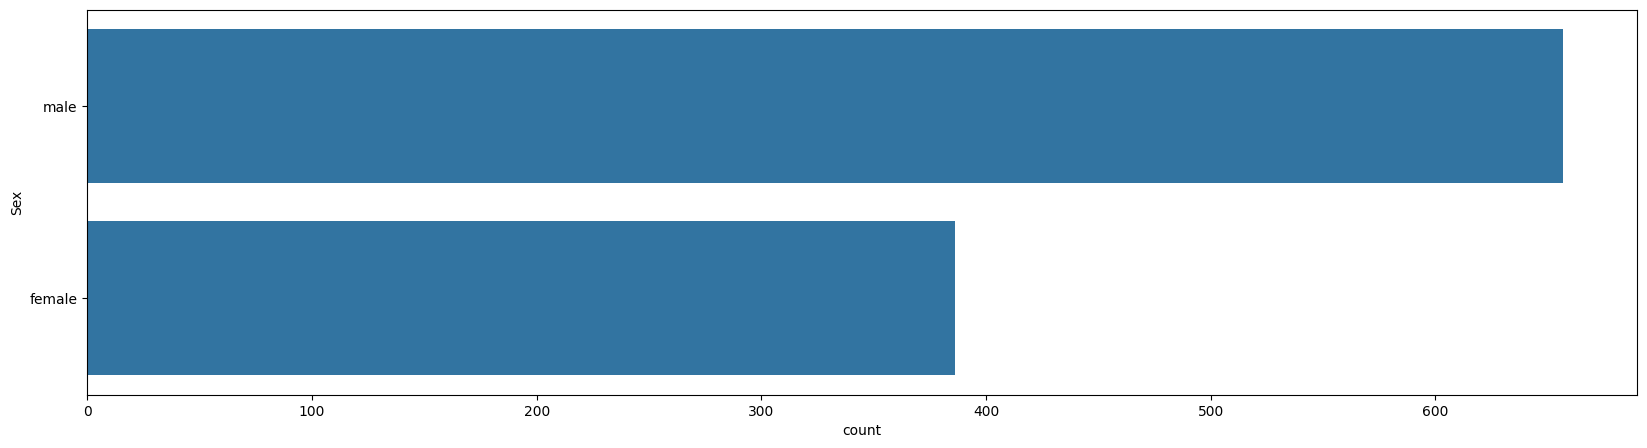

In [12]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=df);

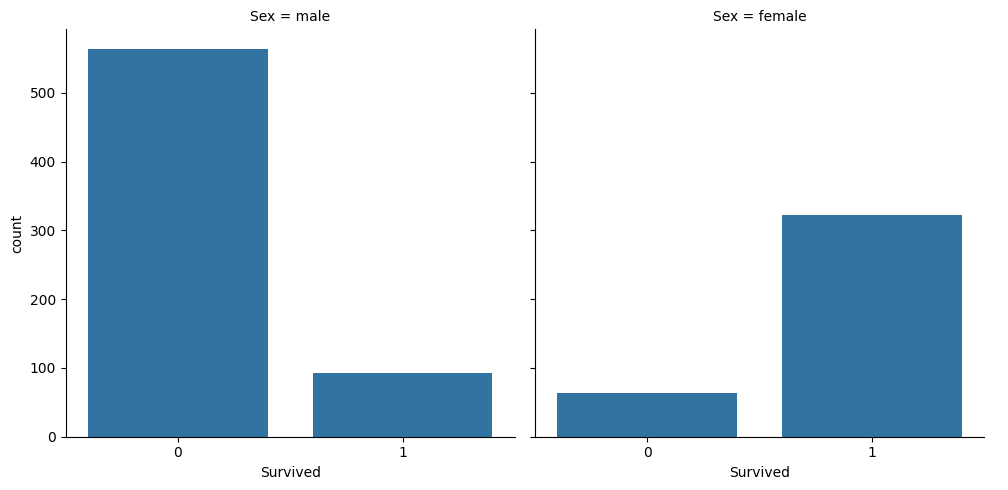

In [13]:
sns.catplot(x='Survived', col='Sex', kind='count', data=df);

(-1.0, 2.0)

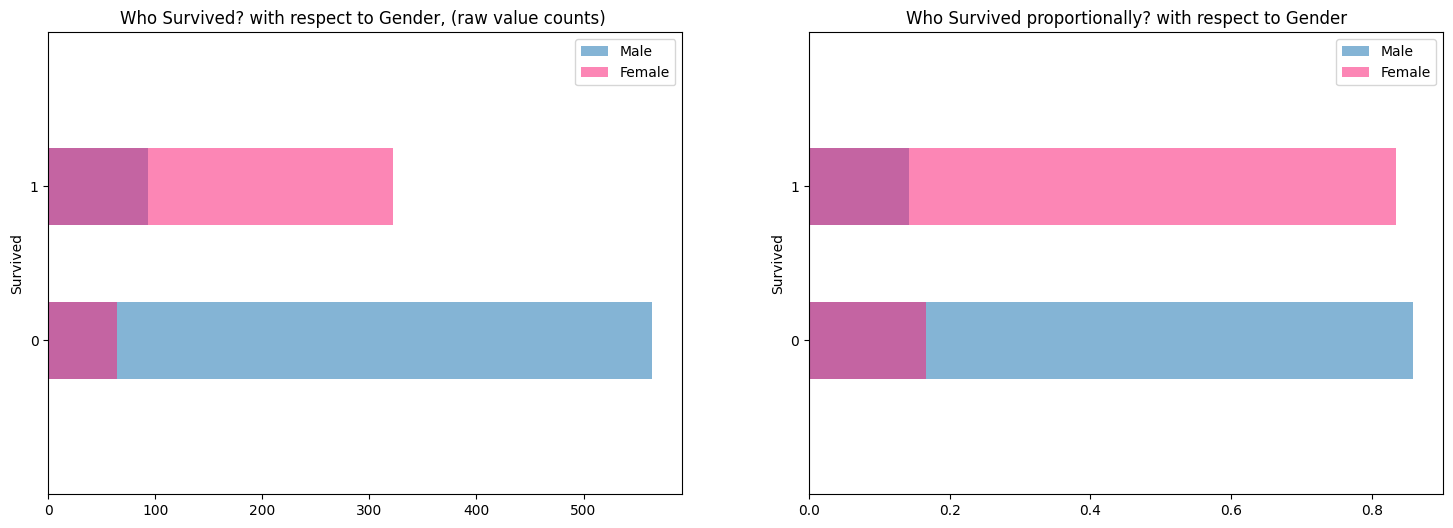

In [14]:
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph.
#'barh' is just a horizontal bar graph
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2)

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

In [15]:
fig = plt.figure(figsize=(18, 4), dpi=1600)
alpha_level = 0.65

# Create an additional subset within the gender subset we created for the survived variable
# Create subsets for each gender and class pair
ax1 = fig.add_subplot(141)
female_highclass = df.Survived[(df.Sex == 'female') & (df.Pclass != 3)].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level, ax=ax1)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class")
plt.legend(loc='best')

ax2 = fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[(df.Sex == 'female') & (df.Pclass == 3)].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level, ax=ax2)
ax2.set_xticklabels(["Died", "Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3 = fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[(df.Sex == 'male') & (df.Pclass == 3)].value_counts()
male_lowclass.plot(kind='bar', label='male, low class', color='lightblue', alpha=alpha_level, ax=ax3)
ax3.set_xticklabels(["Died", "Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4 = fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[(df.Sex == 'male') & (df.Pclass != 3)].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue', ax=ax4)
ax4.set_xticklabels(["Died", "Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

plt.show()

# Feature: SibSp

In [16]:
df.SibSp.value_counts()

SibSp
0    682
1    280
2     36
4     22
3     16
5      6
8      1
Name: count, dtype: int64

<ipython-input-17-698215f5777b>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df[label_column] == 1][target_column],
<ipython-input-17-698215f5777b>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df[label_column] == 0][target_column],


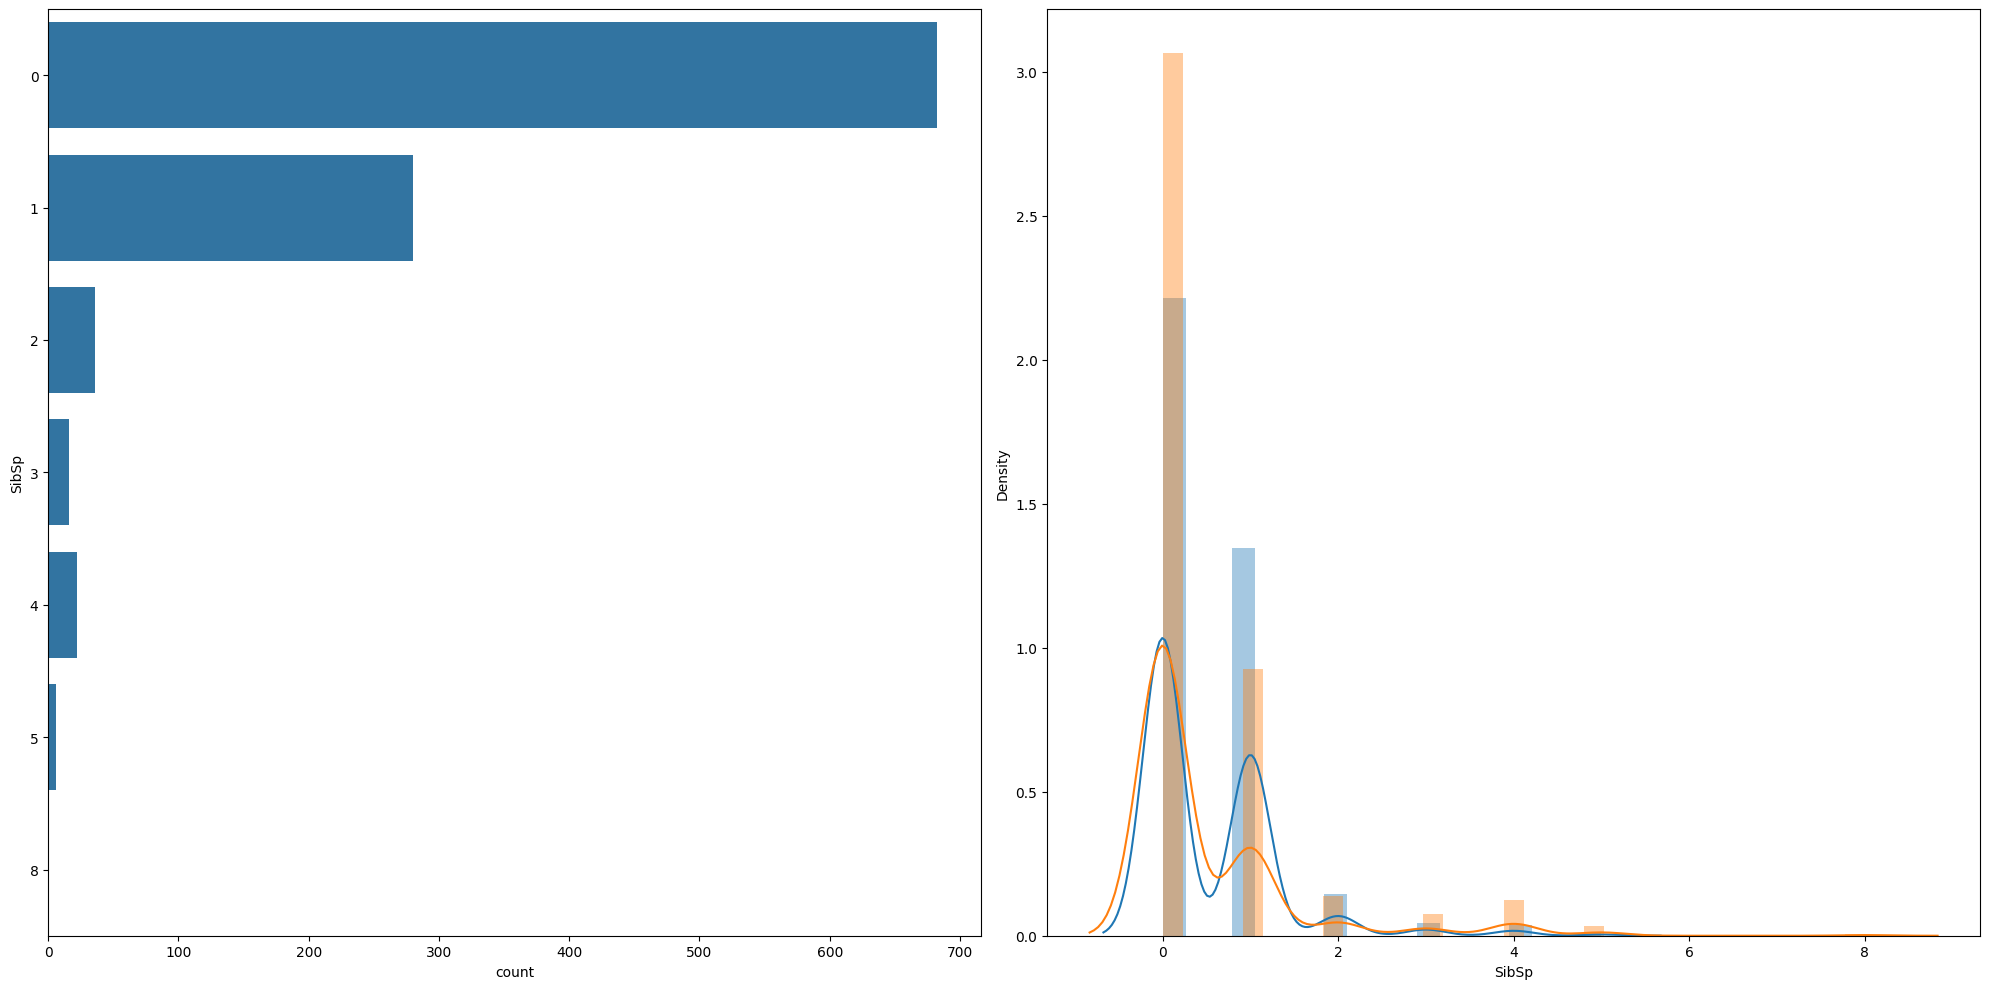

In [17]:
# Parameters for plotting
label_column = 'Survived'
target_column = 'SibSp'
figsize = (20, 10)
use_bin_df = False  # Change to True if you want to use bin_df for plotting

# Plotting directly without function
if use_bin_df:
    fig = plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    sns.countplot(y=target_column, data=df);
    plt.subplot(1, 2, 2)
    sns.distplot(df.loc[df[label_column] == 1][target_column],
                 kde_kws={"label": "Survived"});
    sns.distplot(df.loc[df[label_column] == 0][target_column],
                 kde_kws={"label": "Did not survive"});
else:
    fig = plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    sns.countplot(y=target_column, data=df);
    plt.subplot(1, 2, 2)
    sns.distplot(df.loc[df[label_column] == 1][target_column],
                 kde_kws={"label": "Survived"});
    sns.distplot(df.loc[df[label_column] == 0][target_column],
                 kde_kws={"label": "Did not survive"});

plt.tight_layout()
plt.show()

# Feature: Parch

In [18]:
df.Parch.value_counts()

Parch
0    765
1    160
2     97
3      8
5      6
4      5
6      2
Name: count, dtype: int64

<ipython-input-19-cac490017d49>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df[label_column] == 1][target_column],
<ipython-input-19-cac490017d49>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df[label_column] == 0][target_column],


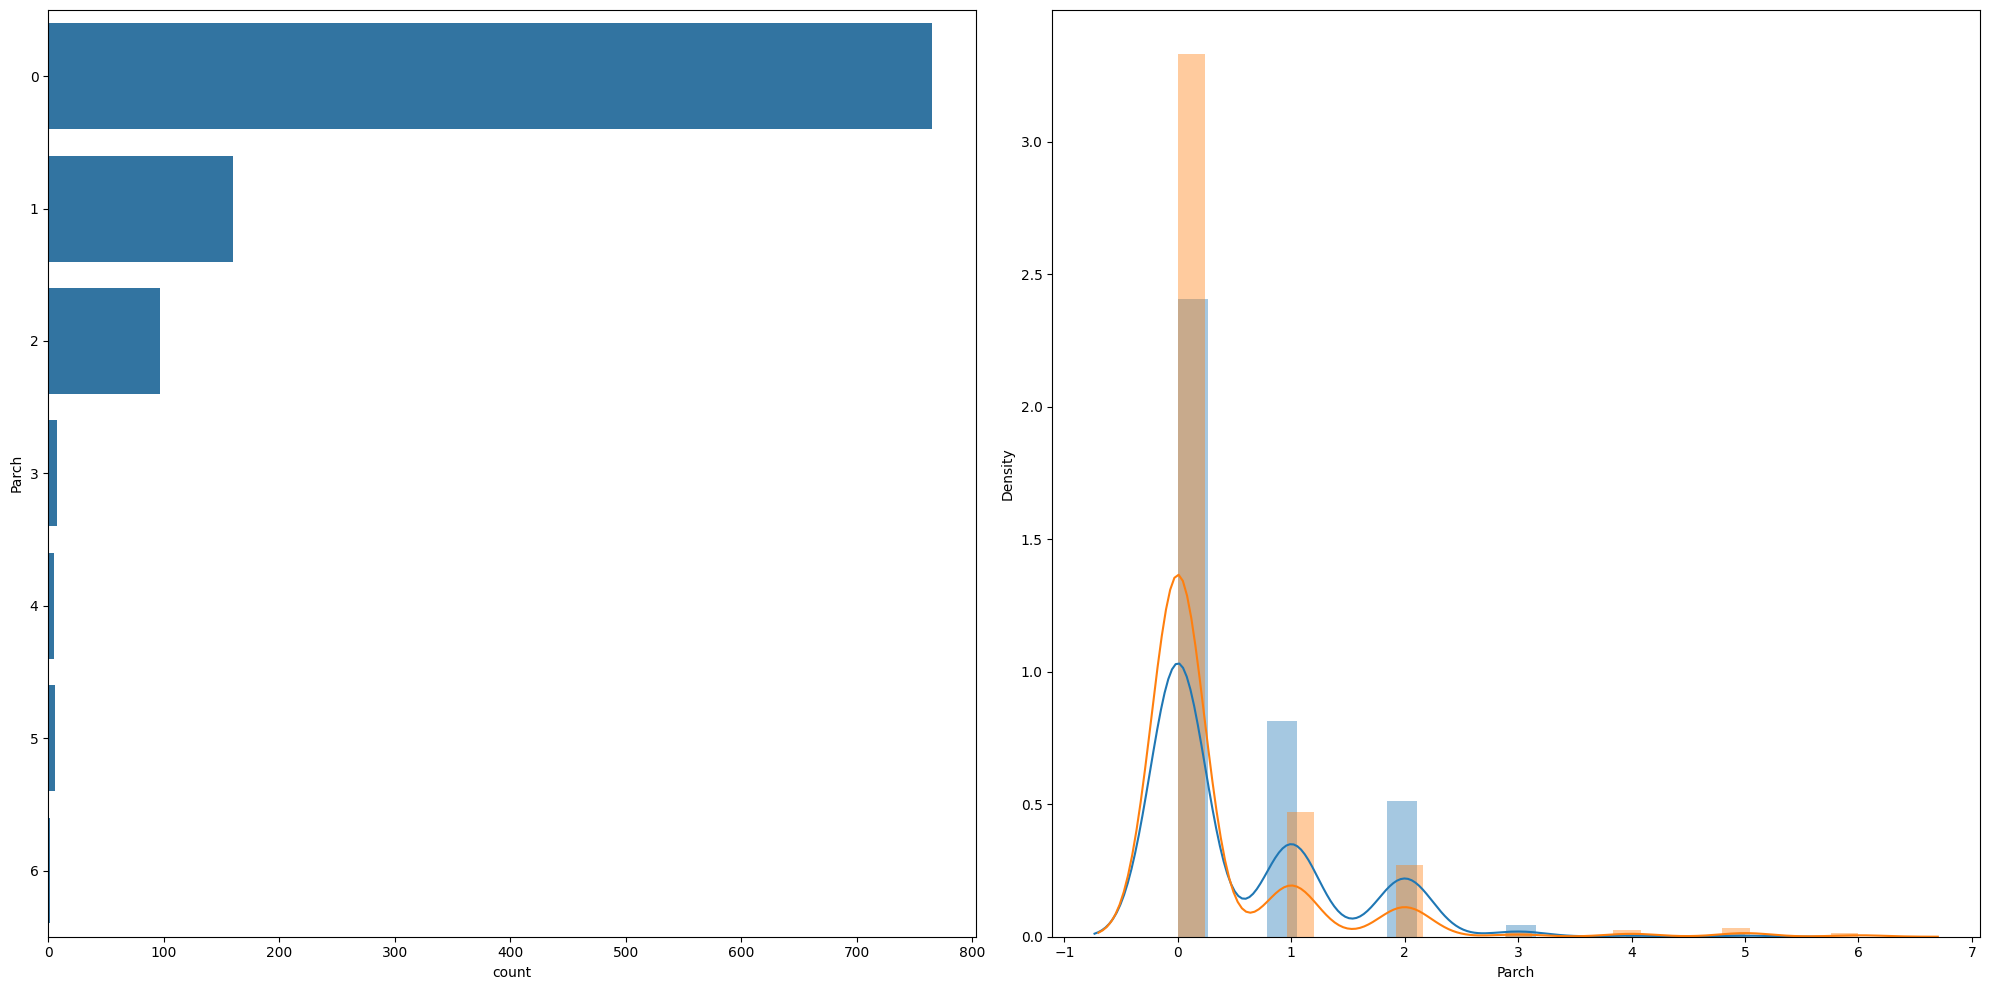

In [19]:
# Parameters for plotting
label_column = 'Survived'
target_column = 'Parch'
figsize = (20, 10)
use_bin_df = False  # Change to False if you want to use the train DataFrame

# Plotting directly without function
if use_bin_df:
    fig = plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    sns.countplot(y=target_column, data=df);
    plt.subplot(1, 2, 2)
    sns.distplot(df.loc[df[label_column] == 1][target_column],
                 kde_kws={"label": "Survived"});
    sns.distplot(df.loc[df[label_column] == 0][target_column],
                 kde_kws={"label": "Did not survive"});
else:
    fig = plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    sns.countplot(y=target_column, data=df);
    plt.subplot(1, 2, 2)
    sns.distplot(df.loc[df[label_column] == 1][target_column],
                 kde_kws={"label": "Survived"});
    sns.distplot(df.loc[df[label_column] == 0][target_column],
                 kde_kws={"label": "Did not survive"});

plt.tight_layout()
plt.show()

# Feature: Embarked

In [20]:
df.Embarked.value_counts()

Embarked
S    781
C    212
Q     50
Name: count, dtype: int64

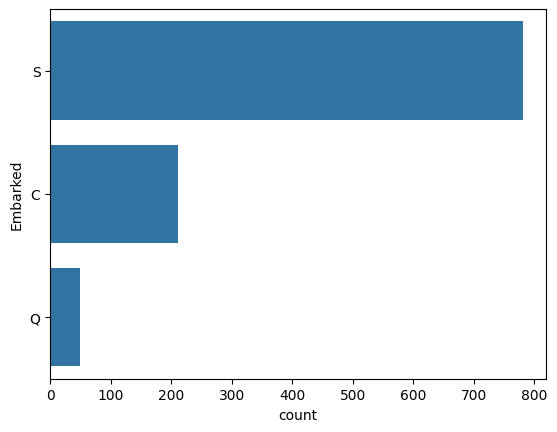

In [21]:
sns.countplot(y='Embarked', data=df);